# Model Training [ Result 1 ] 
# Target variable --> Maths score
### 1.1 Import Data and Required Packages  
Importing Pandas, Numpy, Matplotlib, Seaborn

In [54]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso



Import the CSV Data as Pandas DataFrame

In [26]:
df = pd.read_csv('stud_data.csv')

Show Top 5 Records

In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
df1=df.copy()

# df1['average'] =( (df['math_score'] + df['reading_score'] + df['writing_score'])/3 ).round(2)
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [35]:
X = df1.drop(columns=['math_score'],axis=1)

In [37]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


Unique values in fields

In [38]:
Y = df1['math_score']

In [40]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [41]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [42]:
X = preprocessor.fit_transform(X)

In [49]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [50]:
X.shape

(1000, 19)

In [45]:
df2 = pd.DataFrame(X)

In [46]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333


In [52]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [55]:
#Linear Regression

l1=LinearRegression()
l1.get_params()
l1.fit(X_train,Y_train)
print(l1.intercept_)
print(l1.coef_)

65.52357656600951
[-6.53244193  6.53244193 -0.80262367 -0.44330087 -1.42824083 -1.41585991
  4.09002528 -0.09454143 -0.81144256  0.83477083 -1.49503027  0.90431471
  0.66192873 -1.75503744  1.75503744 -1.64482118  1.64482118  3.44425129
 10.99840031]


In [56]:
predictions=l1.predict(X_test) 
pred_df=pd.DataFrame(Y_test) ### Creating DataFrame of Y_test(Price)and predictions(price)
pred_df['Predictons']=predictions   
pred_df

,math_score,Predictons
521,91,76.387970
737,53,58.885970
740,80,76.990265
660,74,76.851804
411,84,87.627378
...,...,...
408,52,43.409149
332,62,62.152214
208,74,67.888395
613,65,67.022287


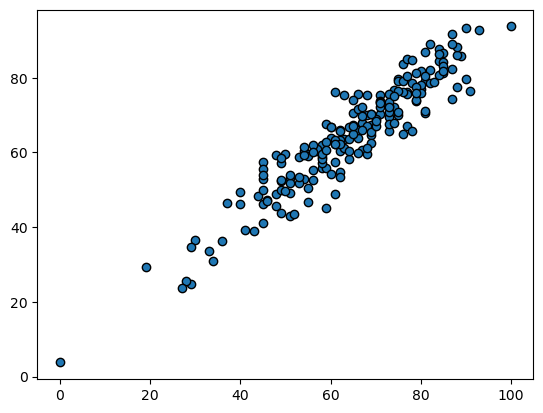

In [57]:
plt.scatter(Y_test,predictions,edgecolors='black')
plt.show()

In [60]:
score=r2_score(Y_test,predictions)*100
print(" Accuracy of the Linear Regression model is %.2f" %score)

 Accuracy of the Linear Regression model is 88.04


In [65]:
features = list( df1.columns ) 
features.remove('math_score') 
features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'reading_score',
 'writing_score']

In [66]:
# Encoding Categorical Features

encoded_df = pd.get_dummies(df1[features])
list(encoded_df.columns)
#encoded_df.shape

['reading_score',
 'writing_score',
 'gender_female',
 'gender_male',
 'race_ethnicity_group A',
 'race_ethnicity_group B',
 'race_ethnicity_group C',
 'race_ethnicity_group D',
 'race_ethnicity_group E',
 "parental_level_of_education_associate's degree",
 "parental_level_of_education_bachelor's degree",
 'parental_level_of_education_high school',
 "parental_level_of_education_master's degree",
 'parental_level_of_education_some college',
 'parental_level_of_education_some high school',
 'lunch_free/reduced',
 'lunch_standard',
 'test_preparation_course_completed',
 'test_preparation_course_none']

In [67]:
encoded_df.head()

,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [68]:
P = encoded_df
Q = df1.math_score

In [71]:
from sklearn.model_selection import train_test_split
P_train,P_test,Q_train,Q_test = train_test_split(P, Q,test_size = 0.3,random_state = 42)

In [72]:
### Building Decision Tree Classifier

from sklearn import tree
tree_clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=4)
tree_clf.fit(P_train,Q_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [73]:
encoded_df.head()

,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


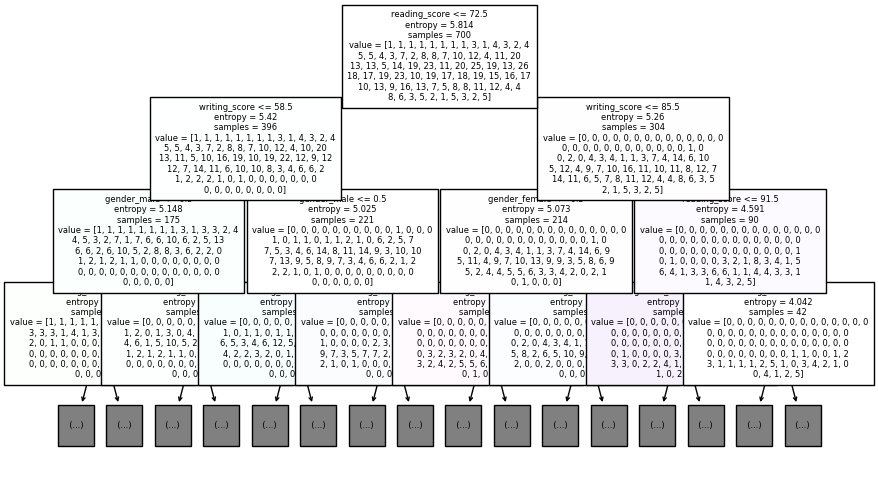

In [74]:
fig,ax=plt.subplots(figsize=(10,6))
tree.plot_tree(tree_clf,ax=ax,feature_names=encoded_df.columns,fontsize=6,filled=True,max_depth=3)
plt.show()

In [75]:
pdt=tree_clf.predict(P_test).round(3)
pdt

array([73, 60, 71, 71, 81, 81, 68, 59, 71, 58, 46, 46, 73, 59, 81, 63, 58,
       46, 49, 59, 61, 49, 63, 32, 81, 81, 71, 49, 32, 59, 58, 61, 58, 61,
       71, 49, 71, 63, 63, 32, 81, 68, 68, 59, 81, 60, 61, 32, 81, 73, 71,
       63, 81, 49, 63, 63, 81, 58, 71, 77, 46, 77, 63, 59, 87, 63, 60, 58,
       60, 88, 68, 77, 58, 49, 58, 81, 77, 58, 59, 58, 68, 46, 71, 60, 61,
       59, 63, 60, 73, 46, 71, 88, 58, 71, 32, 68, 68, 59, 73, 60, 71, 58,
       58, 63, 71, 68, 46, 71, 73, 49, 49, 73, 58, 59, 77, 58, 58, 46, 68,
       81, 60, 59, 81, 73, 60, 68, 63, 63, 46, 71, 73, 71, 46, 88, 63, 32,
       88, 81, 71, 49, 49, 60, 68, 46, 81, 49, 46, 71, 58, 73, 73, 77, 58,
       58, 77, 60, 49, 60, 71, 49, 73, 68, 73, 58, 87, 71, 46, 81, 60, 63,
       81, 68, 77, 73, 46, 32, 58, 73, 88, 73, 60, 63, 88, 68, 81, 58, 60,
       68, 68, 87, 58, 58, 68, 73, 58, 49, 58, 73, 63, 63, 60, 73, 77, 68,
       58, 46, 92, 63, 68, 49, 68, 59, 68, 60, 59, 46, 68, 58, 77, 81, 61,
       49, 73, 81, 46, 88

In [87]:
print(" Accuracy of the Decision Tree Classifier model is ")
r2_score(Q_test,pdt)*100


 Accuracy of the Decision Tree Classifier model is 


74.228056358437